In [1]:
import numpy as np

In [2]:
n = 20
X = np.random.uniform(-3, 5, size=n)

In [3]:
b = [45, -6, 1.2, -1, 0.1]
hata = np.random.normal(0, 4, size=n)

In [4]:
y = b[0] \
+ b[1] * X \
+ b[2] * X**2 \
+ b[3] * X**3 \
+ b[4] * X**4 + hata

In [5]:
import matplotlib.pyplot as plt

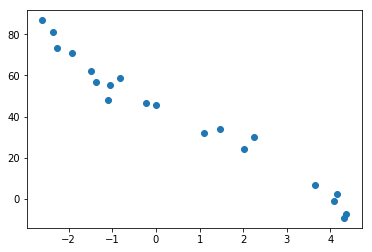

In [6]:
plt.scatter(X, y)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = X.reshape(n, 1)
y = y.reshape(n, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
from sklearn.preprocessing import PolynomialFeatures 

In [10]:
polyRegressor = PolynomialFeatures(degree=3)

In [11]:
polyRegressor.fit(X,y)

PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)

In [12]:
polyRegressor.fit_transform(X)

array([[ 1.00000000e+00,  3.64354385e+00,  1.32754118e+01,
         4.83695451e+01],
       [ 1.00000000e+00, -2.60361634e+00,  6.77881802e+00,
        -1.76494413e+01],
       [ 1.00000000e+00, -2.35576499e+00,  5.54962871e+00,
        -1.30736210e+01],
       [ 1.00000000e+00, -1.92064090e+00,  3.68886148e+00,
        -7.08497825e+00],
       [ 1.00000000e+00, -2.26245995e+00,  5.11872501e+00,
        -1.15809103e+01],
       [ 1.00000000e+00,  4.14659842e+00,  1.71942785e+01,
         7.12977681e+01],
       [ 1.00000000e+00, -1.37403759e+00,  1.88797931e+00,
        -2.59415454e+00],
       [ 1.00000000e+00,  4.96011222e-03,  2.46027133e-05,
         1.22032219e-07],
       [ 1.00000000e+00,  2.01124832e+00,  4.04511980e+00,
         8.13574039e+00],
       [ 1.00000000e+00, -8.15974371e-01,  6.65814173e-01,
        -5.43287301e-01],
       [ 1.00000000e+00, -1.05556730e+00,  1.11422232e+00,
        -1.17613664e+00],
       [ 1.00000000e+00, -1.11029181e+00,  1.23274791e+00,
      

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
degree = [1,2,3,4,5,6,7,8]
poly_train = []
poly_test = []
for dg in degree:
    polyRegressor = PolynomialFeatures(degree=dg, include_bias=False)
    xp = polyRegressor.fit_transform(X_train)
    print(xp.shape)
    regressor = LinearRegression()
    regressor.fit(xp, y_train)
    poly_train.append(regressor.score(xp, y_train))
    poly_test.append(regressor.score(polyRegressor.transform(X_test), y_test))

(16, 1)
(16, 2)
(16, 3)
(16, 4)
(16, 5)
(16, 6)
(16, 7)
(16, 8)


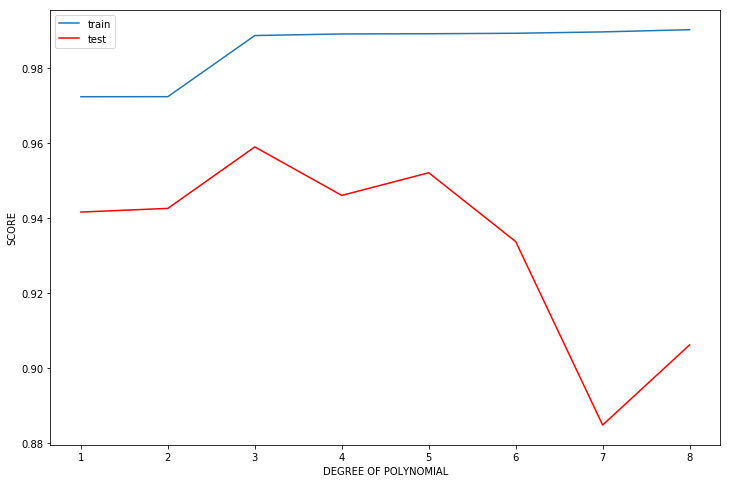

In [15]:
plt.figure(figsize=(12,8))
plt.plot(degree, poly_train, label='train')
plt.plot(degree, poly_test, color='red', label='test')
plt.xlabel('DEGREE OF POLYNOMIAL')
plt.ylabel('SCORE')
plt.legend()

In [24]:
polyRegressor3 = PolynomialFeatures(degree=3)
pc3 = polyRegressor3.fit_transform(X_train)

In [25]:
linear3 = LinearRegression()

In [26]:
linear3.fit(pc3, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
linear3.score(pc3, y_train)

0.9886136975771226

In [28]:
linear3.score(polyRegressor3.transform(X_test), y_test)

0.9589201786686108

In [29]:
linear3.intercept_

array([45.00017142])

In [30]:
linear3.coef_ # we can compare the results with "b"

array([[ 0.        , -7.15363818,  1.51118567, -0.61257193]])

In [24]:
b #results are close to each other

[45, -6, 1.2, -1, 0.1]

In [31]:
y_pred = linear3.predict(pc3)

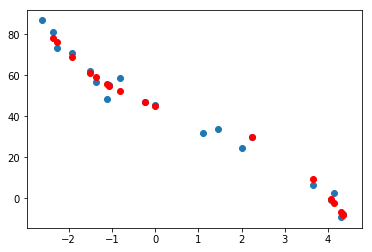

In [32]:
plt.scatter(X, y)
plt.scatter(X_train, y_pred, color='red')